In [1]:
import torchattacks
from torchvision import transforms, models, datasets
import torch
from utils_jnb import *
import torchvision
torch.cuda.empty_cache()
set_global_seed()


In [ ]:
#predict_image('src_model_21.pt','examples')

In [2]:
try:
    saved_model = torch.load('src_model_best_shang.pt')
except:
    saved_model = torch.load('src_model_best_shang.pt',map_location=torch.device('cpu'))

In [3]:

_, attackloader, _,_ , attack_length, _ = getData() #this returns 4 for test
with torch.no_grad():
    for j, (inputs, labels) in enumerate(attackloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
    
        

[3290, 366]
3656


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Class probability: tensor(1., device='cuda:0')


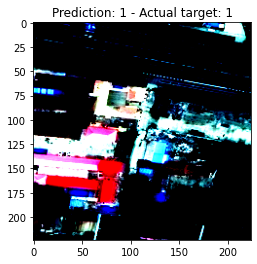

In [7]:
idx=2
with torch.no_grad():
    
    image=inputs[idx]
    #inputs, labels = inputs.cuda(), labels.cuda() 
    #image=image.cpu()
    
    # Generate prediction
    prediction = saved_model(image.unsqueeze(0))

    # Predicted class value using argmax
    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    image=image.cpu()
    image=image.swapaxes(0,1)
    image=image.swapaxes(1,2)

    # Show result
    plt.imshow(image.cpu(), cmap='Spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()



In [8]:
image=inputs[idx]
image

tensor([[[-0.8507, -0.9192, -1.0048,  ..., -1.6384, -1.5528, -1.5528],
         [-1.3130, -1.1589, -0.9877,  ..., -1.3130, -1.2617, -1.3473],
         [-1.3302, -1.2959, -1.3130,  ..., -1.3815, -1.5014, -1.5185],
         ...,
         [-0.5767, -0.8849, -0.9534,  ..., -1.0219, -1.0219, -1.0048],
         [-0.5596, -1.0390, -1.0904,  ..., -0.9020, -0.8849, -0.9705],
         [-0.7822, -1.1589, -1.3987,  ..., -0.9534, -0.9705, -1.0048]],

        [[-0.6352, -0.6877, -0.7752,  ..., -1.5630, -1.5280, -1.5455],
         [-1.0378, -0.8803, -0.7052,  ..., -1.1604, -1.1604, -1.2304],
         [-1.1253, -1.0728, -1.0903,  ..., -1.1078, -1.2304, -1.2829],
         ...,
         [-0.2325, -0.5476, -0.6176,  ..., -1.0903, -1.1078, -1.0903],
         [-0.1975, -0.7052, -0.7577,  ..., -0.9503, -0.9678, -1.0553],
         [-0.4076, -0.8102, -1.0728,  ..., -1.0378, -1.0553, -1.0903]],

        [[-0.0615, -0.1312, -0.2184,  ..., -1.4210, -1.3687, -1.3687],
         [-0.4973, -0.3404, -0.1661,  ..., -1

In [29]:
torch.max(image)

tensor(2.2043)

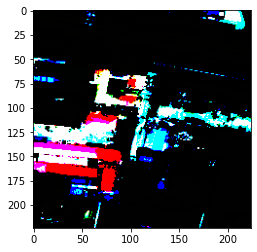

In [10]:
plt.imshow(np.transpose(image.cpu().numpy(), (1, 2, 0)).astype(np.uint8) * 255, cmap='Spectral')


Class probability: tensor(1., device='cuda:0')


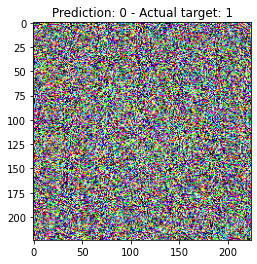

In [17]:
atk = torchattacks.PGD(model=saved_model, eps=100, alpha=2/255, steps=40, random_start=True)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()

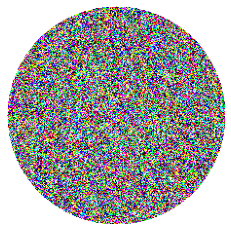

In [32]:


# Convert the tensor to a NumPy array
image = adv_example.cpu().numpy()

# Create a circular mask
height, width, _ = image.shape
center_x, center_y = width // 2, height // 2
radius = min(center_x, center_y)

mask = np.ones((height, width))
y, x = np.ogrid[:height, :width]
dist_from_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)

# Assign mask values based on the distance from the center
mask[dist_from_center > radius] = 0

# Apply the mask to the image
masked_image = image.copy()
for c in range(3):
    masked_image[:, :, c] = masked_image[:, :, c] * mask + (1 - mask)

# Display the circular image
plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [24]:
image

array([[[0.79607844, 0.25098038, 0.15686275],
        [0.        , 0.9529412 , 0.26666665],
        [0.        , 0.99215686, 0.28235292],
        ...,
        [1.        , 0.91372657, 0.24313724],
        [0.05490196, 0.92156947, 1.        ],
        [0.07058823, 1.        , 1.        ]],

       [[0.7960812 , 0.05490196, 0.9843137 ],
        [0.        , 0.20392156, 0.28235295],
        [0.7647059 , 0.15686274, 0.28235292],
        ...,
        [0.01568627, 0.        , 1.        ],
        [1.        , 0.03137255, 0.03921568],
        [0.07058823, 0.98431396, 1.        ]],

       [[0.00784314, 0.79608023, 0.05490196],
        [0.78039527, 1.        , 0.28235292],
        [0.        , 0.7490207 , 0.28235292],
        ...,
        [0.        , 0.        , 0.07058823],
        [0.00784314, 0.        , 0.06274509],
        [0.9999999 , 0.09411764, 1.        ]],

       ...,

       [[0.2352941 , 0.19607843, 0.92156863],
        [1.        , 0.2745098 , 0.85882354],
        [0.        , 0

Class probability: tensor(1., device='cuda:0')


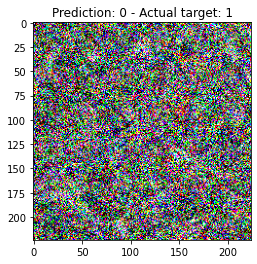

In [31]:
atk = torchattacks.PGD(model=saved_model, eps=5, alpha=2/255, steps=40, random_start=True)
adv_example=atk(inputs, labels)[idx]
with torch.no_grad():

    prediction = saved_model(adv_example.unsqueeze(0))

    predicted_class = np.argmax(prediction.cpu())
    print("Class probability: " +str(torch.max(nnf.softmax(prediction, dim=1))))

    # Reshape image

    adv_example=adv_example.cpu()
    adv_example=adv_example.swapaxes(0,1)
    adv_example=adv_example.swapaxes(1,2)

    # Show result
    plt.imshow(adv_example.cpu(), cmap='nipy_spectral')
    plt.title(f'Prediction: {predicted_class} - Actual target: '+str(labels[idx].detach().cpu().numpy()))
    plt.show()